<a href="https://colab.research.google.com/github/tbradshaw91/AB-Demo/blob/master/College_Majors_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pulling in all of the dataframes related to my research. I may or may not use them all, but it is good to have all of my data in one place to reference.  **

**Data Source: data.world, pulled together from fivethirtyeight**

In [63]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 22.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [64]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
import pandas as pd 

# Pulling in my DF
ages_df = 'https://query.data.world/s/gpe2sgsocg7ru2jccqrueoxtgyanvq'

# Assigning a new name to call it
ages = pd.read_csv(ages_df)

In [0]:
grad_students_df = 'https://query.data.world/s/dokg22nzpeop44ucb5jddqnafhdpof'
grad_students = pd.read_csv(grad_students_df)

In [0]:
majors_list_df = 'https://query.data.world/s/gm4rcgbkotyels5353ux45uoowkyrh'
majors_list = pd.read_csv(majors_list_df)

In [0]:
recent_grads_df = 'https://query.data.world/s/e64g4m5iajb4afuc2u5gdg4hl5phmp'
recent_grads = pd.read_csv(recent_grads_df)

In [0]:
women_stem_df = 'https://query.data.world/s/fwefnniaqi5qzse5ijnipvrf6fbzgh'
women_stem = pd.read_csv(women_stem_df)

**Now that I have all of my data loaded, I am going to check out what each DF has to offer, look at the shape and select a couple of frames to begin visualizing.**

In [0]:
ages.head()

In [32]:
ages.shape

(173, 11)

**Note: Grad Students are presumably 25 + **

In [0]:
grad_students.head()

In [35]:
grad_students.shape

(173, 22)

In [0]:
majors_list.head()

**Note: Recent Grads are presumably <28**

In [0]:
recent_grads.head()

In [0]:
women_stem.head()

In [36]:
women_stem.shape

(76, 9)

I aim to perform a basic analysis to solve the question of why there are not more women in technology? My belief is that women are not persuing stem related degrees. Thus, there are not enough qualified female applicants for tech related job openings. I believe if I am able to prove my theory, we can then begin the conversation of how do we get more women interested in pursing a stem degree. 

**Since the goal is to examine what women go to school for, it is beneficial to look at all the degrees sorted into women, then go into stem specifically **

In [37]:
# Will need to look at recent grads in order to achieve this
recent_grads.columns

# The columns that matter for this are major, major category, total and men, women

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

In [0]:
# First I will check for nulls
recent_grads.isna().sum()

# We have 1 in Unemployment Rate, but I am not concerned about it since I am not focusing on unemployment just yet. 

In [0]:
# Create a new DF for these cols exactly
what_majors = (recent_grads[['Major_code', 'Major', 'Major_category', 'Total', 'Men', 'Women']])

In [56]:
what_majors.head()

,Major_code,Major,Major_category,Total,Men,Women
0,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282
1,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77
2,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131
3,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135
4,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021


**Working on visualizations aimed towards:**

** Total first, in order to see a high level, non gender pov **
*   Total vs Major Category
*   Total vs Majors

** Majors from a high level then filtered down by specifics and gender **
*   Major Category vs Men
*   Major vs Men
*   Major Category vs Women
*   Major vs Women



In [0]:
# This doesn't tell me much, a plot that allows for categorical variables would be a better indicator unless i was to encode things
# Adding the Major_code is a way to visualize using numeric values only
what_majors.plot.scatter(x='Total', y='Women');
what_majors.plot.scatter(x='Total', y='Men');

In [0]:
# Now I am kind of getting somewhere, going this way, we are able to visualize what major, 
# indicated on the x-axis and the total amount of students who went for that major.
what_majors.plot.scatter(x='Major_code', y='Total');

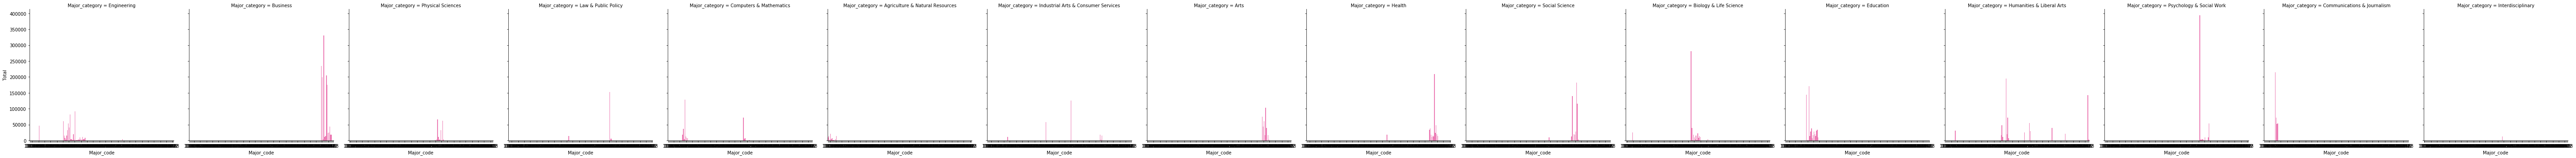

In [75]:
sns.catplot(x='Major_code', y='Total', col='Major_category',
           kind='bar', data=what_majors, color='hotpink');